# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [ ]:
import pandas as pd

In [ ]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [ ]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [ ]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [ ]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [ ]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [ ]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [ ]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [ ]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [ ]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [ ]:
# df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [ ]:
# df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [ ]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


In [ ]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


In [ ]:
# (예시1) 정류장 수와 승차 총 승객수는 관계가 있다.

# H0 : 정류장 수와 승차 총 승객수는 연관이 없다.

# H1 : 정류장 수와 승차 총 승객수는 연관이 있다.
import scipy.stats as spst
spst.pearsonr(df['정류장수'],df['승차총승객수'])

# 강한 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 정류장수와 승차총승객수는 상관관계가 있다?


(0.5666813370974585, 0.003141977397117322)

In [ ]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1'])

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,1.163090e+07,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.437297,6543820,2.918250e+07,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,0.638150
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,2.299774e+07,0.735588
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,0.770887
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.411314,46.134844,4952990,1.019598e+07,0.777693
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,23.209394,49.140477,4383860,9.281801e+06,0.795676
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.745571,61.736901,5525180,1.568630e+07,0.810122


In [ ]:
# (예시2) 노선 수와 총 이동시간은 관계가 있다.

# H0 : 노선 수와 총 이동시간은 연관이 없다.

# H1 : 노선 수와 총 이동시간은 연관이 있다.

spst.pearsonr(df['노선수'],df['총 이동 시간'])

# 중간 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 노선수와 총 이동 시간은 상관관계가 있다?

(0.3605000532735534, 0.07667781622760951)

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

    ? 정해진게 없나요? - 네 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


    ? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다


    ? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1    
구별 등록 업종 상위 10개 데이터 중 한식일반음식점업/커피전문점/한식 육류요리 전문점 등이 많은 곳에 노선수가 많을 것이다.

* 가설 2    
구별 등록 업종 상위 10개 데이터 중 택시운송업 사업체 등이 많은 곳에 정류장수가 많을 것이다.

* 가설 3    
정류장 수보단 노선수가 더 연관이 있다면 노선수를 늘려야 하지 않을까?

## 2.단변량 분석 
(조별로 3개 정도의 변수만 진행해주세요)

+ 변수의 의미  

+ 숫자? 범주?

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용 정리  

+ 추가 분석해볼 사항 도출

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬에서 사용하신다면 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# AIDU에서 사용하신다면 나눔 고딕

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

# scipy
import scipy.stats as spst

### 1)


In [ ]:
df_business_type = pd.read_csv('business_type.csv', sep=",", encoding = 'UTF-8',thousands=',')

In [ ]:
df_business_type = df_business_type.drop(['동'], axis=1)

In [ ]:
df_business_type.head()

,자치구,택시운송업 사업체,택시운송업,한식 일반 음식점업 사업체,한식 일반 음식점업,용달 화물자동차 운송업 사업체,용달 화물자동차 운송업,부동산 중개 및 대리업 사업체,부동산 중개 및 대리업,두발미용업 사업체,...,커피전문점 사업체,커피전문점,남녀용 겉옷 및 셔츠 도매업 사업체,남녀용 겉옷 및 셔츠 도매업,기타주점업 사업체,기타주점업,일반 교과 학원 사업체,일반 교과 학원,한식 육류요리 전문점 사업체,한식 육류요리 전문점
0,종로구,215,215,1548,5912,618,646,549,889,261,...,948,3613,400,962,537,1413,110,382,437,1982
1,중구,230,235,1588,6414,300,333,576,1152,339,...,869,3542,10810,24248,381,982,57,175,443,2121
2,용산구,416,523,857,2987,455,466,791,1214,366,...,634,2076,54,317,487,1332,104,573,300,1184
3,성동구,1200,2527,956,2785,1072,1161,801,1453,489,...,547,1859,149,1572,285,621,258,1494,400,1545
4,광진구,1119,1744,963,2861,968,985,871,1313,746,...,590,1887,89,687,633,1577,413,1646,467,1678


In [ ]:
df_tmp = pd.merge(df,df_business_type,how='inner', on='자치구')
df_tmp.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),...,커피전문점 사업체,커피전문점,남녀용 겉옷 및 셔츠 도매업 사업체,남녀용 겉옷 및 셔츠 도매업,기타주점업 사업체,기타주점업,일반 교과 학원 사업체,일반 교과 학원,한식 육류요리 전문점 사업체,한식 육류요리 전문점
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,...,948,3613,400,962,537,1413,110,382,437,1982
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,...,869,3542,10810,24248,381,982,57,175,443,2121
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,...,634,2076,54,317,487,1332,104,573,300,1184
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,...,547,1859,149,1572,285,621,258,1494,400,1545
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,...,590,1887,89,687,633,1577,413,1646,467,1678


In [ ]:
df_tmp.columns

Index(['도착 시군구 코드', '자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '비율1',
       '택시운송업 사업체', '택시운송업', '한식 일반 음식점업 사업체', '한식 일반 음식점업',
       '용달 화물자동차 운송업 사업체', '용달 화물자동차 운송업', '부동산 중개 및 대리업 사업체', '부동산 중개 및 대리업',
       '두발미용업 사업체', '두발미용업', '커피전문점 사업체', '커피전문점', '남녀용 겉옷 및 셔츠 도매업 사업체',
       '남녀용 겉옷 및 셔츠 도매업', '기타주점업 사업체', '기타주점업', '일반 교과 학원 사업체', '일반 교과 학원',
       '한식 육류요리 전문점 사업체', '한식 육류요리 전문점'],
      dtype='object')

In [ ]:
idx=['평균 이동 시간(분)', '이동인구(합)', '총 이동 시간' , '총 이동인구']
df_tmp = df_tmp.drop(idx, axis=1)

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   도착 시군구 코드            25 non-null     int64  
 1   자치구                  25 non-null     object 
 2   정류장수                 25 non-null     int64  
 3   노선수                  25 non-null     int64  
 4   승차총승객수               25 non-null     int64  
 5   하차총승객수               25 non-null     int64  
 6   승차평균승객수              25 non-null     float64
 7   하차평균승객수              25 non-null     float64
 8   택시운송업 사업체            25 non-null     object 
 9   택시운송업                25 non-null     object 
 10  한식 일반 음식점업 사업체       25 non-null     object 
 11  한식 일반 음식점업           25 non-null     object 
 12  용달 화물자동차 운송업 사업체     25 non-null     object 
 13  용달 화물자동차 운송업         25 non-null     object 
 14  부동산 중개 및 대리업 사업체     25 non-null     object 
 15  부동산 중개 및 대리업         25 non-null     objec

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
df_tmp.to_csv('df_tmp.csv', index=False)

In [ ]:
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.3350547104994601, 0.10158310909353065)

### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


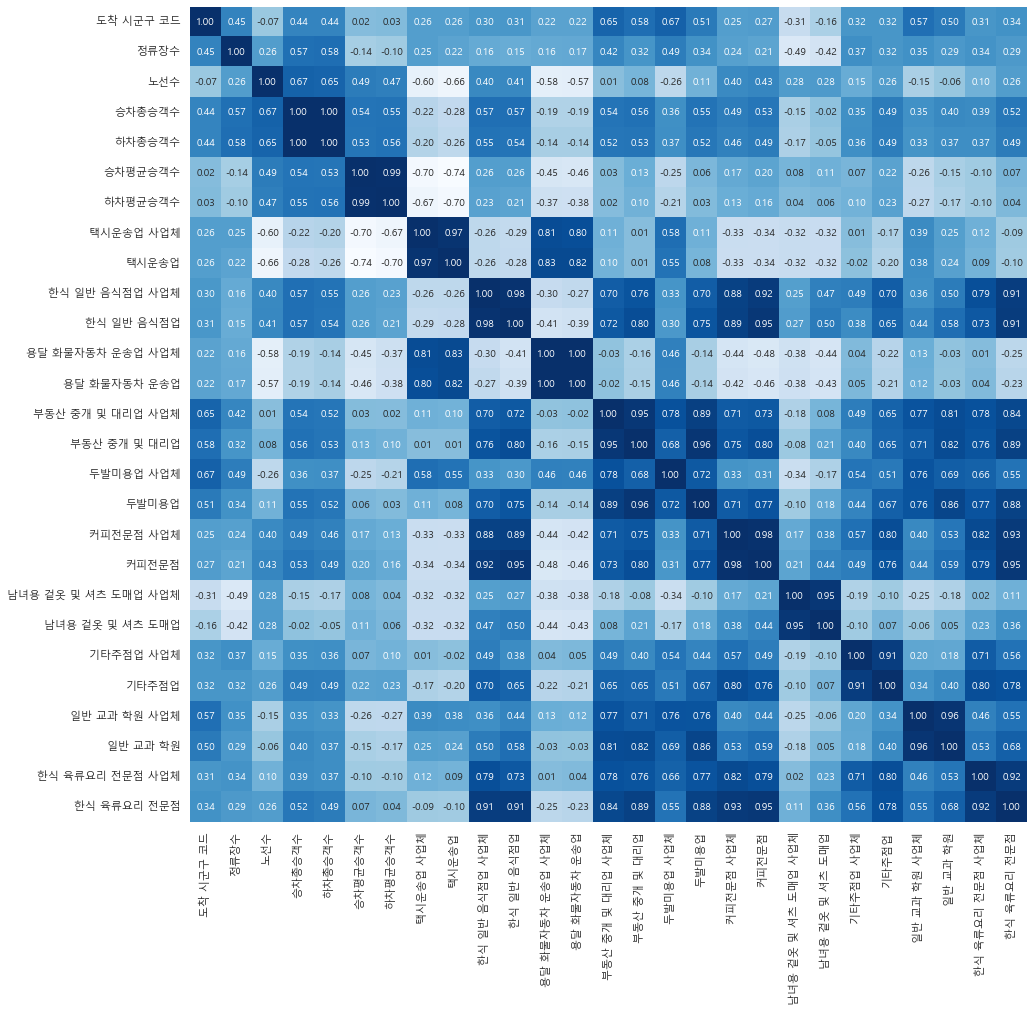

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_tmp.corr(), annot=True, annot_kws={'size': 10}, fmt='.2f', cmap='Blues', cbar=False)
plt.show()

### 1)

In [ ]:
feature='기타주점업 사업체'
target='정류장수'

In [ ]:
#한식 일반 음식점업 사업체
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.1579525877420433, 0.45079944072151673)

In [ ]:
#커피전문점 사업체
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.24064271378327762, 0.24656211167736675)

In [ ]:
#기타주점업 사업체
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.36697158696218213, 0.07115719485759615)

### 2)

In [ ]:
feature='승차총승객수'
target='정류장수'

In [ ]:
#택시운송업 사업체와 정류장 수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.2548175784223299, 0.2189681588726551)

In [ ]:
#택시운송업 사업체와 노선수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(-0.6014400720696349, 0.0014720884625314345)

In [ ]:
#택시운송업 사업체와 노선수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(-0.6014400720696349, 0.0014720884625314345)

### 3)

In [ ]:
#정류장수와 노선수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.2548175784223299, 0.2189681588726551)

In [ ]:
#승차총승객수와 노선수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.6654877832095702, 0.0002830862285771981)

In [ ]:
#승차총승객수와 정류장수
import scipy.stats as spst
spst.pearsonr(df_tmp[feature], df_tmp[target])

(0.5666813370974585, 0.003141977397117322)

## 4.관계 정리

### 1) 강한 관계의 변수

* 택시 운송업자 사업체 수와 노선수의 관계는 강한 음의 상관계수를 가진다.

* 승차총승객수를 노선수와 정류장수 각각 상관분석을 했을 때, 모두 강한 양의 상관계수를 나타냈다. 
그중 노선수와 더 강한 관계를 가진다.

### 2) 약한 관계의 변수

* 각 음식점의 사업체 수와 정류장 수의 관계는 약한 관계를 나타낸다.

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

음식점과는 큰 관련이 없고 운송업이 적은곳과 승차 총 승객 수가 높은 곳에(개인 차가 없거나 차를 많이 이용안하는 곳에) 정류장보단 노선수를 증가시키는것이 합당하다.
